# Analyze Meta Data
Load and analyze the Meta Data

In [20]:
import numpy as np
import os as os
import sys as sys
import multiprocessing as mp
import pandas as pd
import socket
import matplotlib.pyplot as plt
import matplotlib.dates as dts
from datetime import date, timedelta, time

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)
rcParams['axes.linewidth'] = 0.2  # Set the Default Size of the Boundary for small 2.25in width figures

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(f"Current machine: {socket_name}")
if socket_name == "DESKTOP-5RJD9NC":
    path = "/gitProjects/covid19_data"   # The Path on Harald's machine
elif socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/covid19_data/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())

Current machine: compute-a-16-161.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/covid19_data


### Read the Data

In [21]:
path = "./data/apr20/metadata.tsv"
#"data", month, f"metadata{day}.tsv"
data_path = os.path.join(path)
df = pd.read_csv(data_path, sep="\t")
print(f"Loaded {len(df)} Sequences")

Loaded 12717 Sequences


# Do Histograms

# Do a plot per Region

In [22]:
color_dict = {"Europe": "lime",
              "Asia": "blue",
              "North America":"red",
              "Oceania":"lightskyblue",
              "South America":"orange",
              "Africa":"gray",
              "Central America":"gray"
              }

In [23]:
def plot_hist(df, color_dict, plot_col="region", ec="k",
              width=0.9, title="Viral Genomes per Region",
              figsize=(3,5), savepath="", fs=12, rotation=30):
    """Plot Histogram of Values in plot_col in
    dataframe df"""
    vc = df[plot_col].value_counts()
    labels = vc.index.to_list()
    colors = [color_dict[l] for l in labels]
    ax = vc.plot(kind='bar', figsize=figsize, width=width, 
                 ec=ec, color=colors)
    for i, xtick in enumerate(ax.get_xticklabels()):
        lab = xtick.get_text()
        c = color_dict[lab]
        xtick.set_color(c)
    plt.xticks(rotation=rotation, ha='right')
    
    ### Set Text Label
    label="Sequences \nper region"
    ax.text(0.5, 0.95, label, horizontalalignment='left',      
        verticalalignment='top', transform=ax.transAxes,
       fontsize=fs)
    
    ### Save the Figure
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', 
                    pad_inches = 0, dpi=200)
        print(f"Saved to {savepath}")
    plt.show()

Saved to ./figures/dumpster/covid19_hist.png


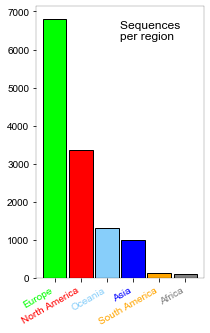

In [24]:
plot_hist(df, color_dict, 
          figsize=(3,5), savepath="./figures/dumpster/covid19_hist.png")

### Make a global map plot

## Plot Dates

In [25]:
def plot_hist_dates(dates, date_last=0, days_back=60,
              fs = 14, fs_l=6, figsize=(5,6), color="gray",
              show=True):
    """Plot histogram of dates"""
    if not date_last:
        today = date.today()
    date_bins = [today -  timedelta(days=i) for i in range(days_back, -1, -1)]
    dates = [d.to_pydatetime().date() for d in dates]
    label = f"Sequences submitted daily\n{date_bins[0]} - {date_bins[-1]}\nTotal: {len(dates)}"

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hist(dates, ec="k", color=color, bins=dts.date2num(date_bins))
    ax.set_xlabel("Date", fontsize=fs)
    ax.set_ylabel("Count", fontsize=fs)
    plt.xticks(rotation=45, ha='right')
    ax.text(0.02, 0.9, label, horizontalalignment='left',      
            verticalalignment='center', transform=ax.transAxes,
           fontsize=fs)
    if show:
        plt.show()

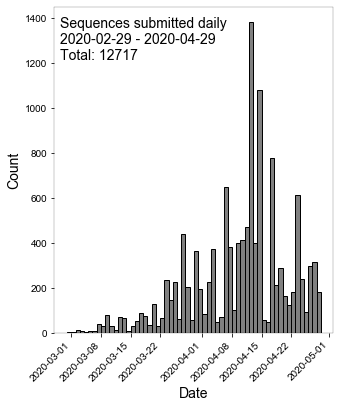

In [26]:
dates =  pd.to_datetime(df["date_submitted"]) #.apply(lambda x: date(x.year,x.month,x.day))
plot_hist_dates(dates, color="gray")

# Plot cumulative Dates

In [27]:
def plot_cumulative_dates(dates, figsize = (4,6),
                         savepath="./figures/dumpster/covid19.png", fs=8,
                         date_last = False, days_back=60, color="k",
                         scale="lin"):
    """Plot Cumulaative Dates"""
    if not date_last:
        today = date.today()
    date_bins = [today -  timedelta(days=i) for i in range(days_back, -1, -1)]
    date_bins = [np.datetime64(d) for d in date_bins]
    counts = dates.value_counts(bins=date_bins, sort=False)
    cum_counts = np.cumsum(counts.values)
    
    label = f"Available \nSARS-CoV-2 \nGenomes \n(n={cum_counts[-1]})"
    
    plt.figure(figsize=figsize)
    ax=plt.gca()
    ax.plot(date_bins[:-1], cum_counts, "o-",
           color=color)
    ax.set_xlabel("Date", fontsize=fs)
    ax.set_ylabel("Cumulative Count", fontsize=fs)
    plt.xticks(rotation=30, ha='right')
    
    ax.text(0.1, 0.95, label, horizontalalignment='left',      
       verticalalignment='top', transform=ax.transAxes,
       fontsize=fs)
    ax.set_yscale(scale)
    
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=200)
        print(f"Saved to {savepath}")
    plt.show()

Saved to ./figures/dumpster/covid19_cum.png


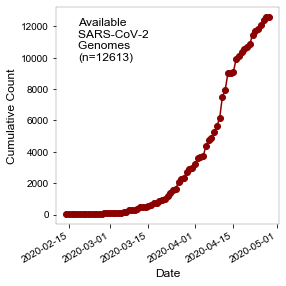

In [30]:
dates =  pd.to_datetime(df["date_submitted"])
plot_cumulative_dates(dates, figsize=(4,4), fs=12, color="#8b0000",
                      savepath="./figures/dumpster/covid19_cum.png",
                      days_back=75, scale="linear")